# Tumor Drug Clinical Trial Effects Analysis
### Data: 
1. Mouse & drug data (`mouse ID`, `drug`)
2. clinical trail measurement data (`mouse ID`, `measure timepoint (day)`, `tumor volume`, `metastatic sites`, `drug`)

There are **10** `drugs` tested, and effects of each drug are measured at **10** different `timepoints` (days).

### Analysis:
1. Create `line plots` with error bars, displaying different measurements regarding each drug over the duration of 45 days: 
    1. **`Tumor volume`**` variation (measured in mm3)`
    2. `Number of `**`metastatic sites`**
    3. `mouse `**`survival rate`**
    


2. Create a dataframe summarizing the mean effect (on `tumor size`, `metastatic sites`, and `survival rate`) of each drug over the duration of 45 days

    
3. A comparative `bar chart`, displaying the effect on **% change** in `tumor volume` across all drugs tested, with tumor size increasing marked `red` and size decreasing marked `green`

### Conclusions

#### Best Drug: `Ramicane`, Second Best: `Capomulin`,    All others are similar to `placebo` or show little improvements

1. Of the `10` drugs tested, there are only **2** drugs (`Capomulin` and `Ramicane`) that significantly reduces tumor size over the 45 days period, both drugs significantly outperform other drugs (includig `placebo`).


2. In terms of `Tumor size change` over time:
    1. `Capomulin` and `Ramicane` significantly reduces tumor size
    2. `Infubinol`, `Ceftamin`, `Propriva`, `Zoniferol` show **_slight_ improvement** compared to `placebo`, but effects are not signifcant
    3. `Ketapril`, `Naftisol`, `Stelasym` behaves similar to `placebo` (with **no curing effect** on tumors), sometimes even show worse behavior compare to it. Maybe due to statistical fluctuation
    
    
3. In terms of `Metastatic sites`:
    * all drugs seem to successfully **prohibit** the spreading of the tumor to other sites (compared to `placebo`). Again, `Capomulin` and `Ramicane` are 2 top performers (`Ramicane` > `Capomulin`) among all the drugs 
    
    
4. In terms of `Survival rate`:
    1. within the 45 days trial, mice tested with all drugs show decrease in number.
    2. mice took `Capomulin` and `Ramicane` show significantly higher survival rate than other drugs
    3. `Propriva` seem to cause an increase of death rate
    4. all other drugs are somewhat similar to `placebo`

### Detailed Analysis

In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import sem

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_drug_df = pd.read_csv(mouse_drug_data_to_load)
clinical_trial_df = pd.read_csv(clinical_trial_data_to_load)

print(mouse_drug_df.head())
print(clinical_trial_df.head())

# Combine the data into a single dataset
mouse_clinic_df = pd.merge(clinical_trial_df, mouse_drug_df , on = 'Mouse ID', how = "left")

# Display the data table for preview
mouse_clinic_df.head()

  Mouse ID      Drug
0     f234  Stelasyn
1     x402  Stelasyn
2     a492  Stelasyn
3     w540  Stelasyn
4     v764  Stelasyn
  Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites
0     b128          0                45.0                 0
1     f932          0                45.0                 0
2     g107          0                45.0                 0
3     a457          0                45.0                 0
4     c819          0                45.0                 0


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1,f932,0,45.0,0,Ketapril
2,g107,0,45.0,0,Ketapril
3,a457,0,45.0,0,Ketapril
4,c819,0,45.0,0,Ketapril


## Data Exploration

In [2]:
# Drugs used
print(mouse_clinic_df["Drug"].value_counts())
print("\n")
drug_list = list(mouse_clinic_df["Drug"].value_counts().index)
print("There are {} types of drugs tested: \n{}".format(len(drug_list),
                                                     ", ".join(x for x in drug_list)))

Capomulin    230
Ramicane     228
Stelasyn     194
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Infubinol    178
Ceftamin     178
Propriva     161
Name: Drug, dtype: int64


There are 10 types of drugs tested: 
Capomulin, Ramicane, Stelasyn, Ketapril, Naftisol, Zoniferol, Placebo, Infubinol, Ceftamin, Propriva


In [3]:
print(mouse_clinic_df["Timepoint"].value_counts())
timepoint_list = list(mouse_clinic_df["Timepoint"].value_counts().index)
print("\n")
print("There are {} Timepoints throughout all drug tests:\n{}".format(len(timepoint_list), 
                                                                    ", ".join(str(x) for x in timepoint_list)))
print("But not all mousse are tested though all the timepoints listed.")

0     252
5     240
10    225
15    209
20    197
25    184
30    172
35    155
40    142
45    130
Name: Timepoint, dtype: int64


There are 10 Timepoints throughout all drug tests:
0, 5, 10, 15, 20, 25, 30, 35, 40, 45
But not all mousse are tested though all the timepoints listed.


## Tumor Response to Treatment

In [4]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
# Convert to DataFrame
mean_tumor_V_df = mouse_clinic_df.groupby(["Drug", "Timepoint"]).mean()["Tumor Volume (mm3)"].reset_index()

# Preview DataFrame
mean_tumor_V_df.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [5]:
# function that finds the data points corresponding to the certain "Drug" and "Timepoint"
# return the standard error of the group of data

def standard_error(row):
    drug = mean_tumor_V_df.iloc[row, 0]
    timepoint = mean_tumor_V_df.iloc[row, 1]
    cons = (mouse_clinic_df["Drug"] == drug) & (mouse_clinic_df["Timepoint"] == timepoint)
    sem_df = mouse_clinic_df[cons]
    return sem(sem_df["Tumor Volume (mm3)"])

In [6]:
# Store the Standard Error of Tumor Volumes selected by Drug and Timepoint
standard_error_list = []
for i in range(len(mean_tumor_V_df)):
    standard_error_list.append(standard_error(i))

# Convert to pd.Series
mean_tumor_V_df["Tumer Volumne Standard Error (mm3)"] = pd.Series(standard_error_list)

# Preview DataFrame
mean_tumor_V_df.head()

,Drug,Timepoint,Tumor Volume (mm3),Tumer Volumne Standard Error (mm3)
0,Capomulin,0,45.000000,0.000000
1,Capomulin,5,44.266086,0.448593
2,Capomulin,10,43.084291,0.702684
3,Capomulin,15,42.064317,0.838617
4,Capomulin,20,40.716325,0.909731


In [7]:
# Reshape the df to a new format
drug_timepoint_df = mean_tumor_V_df.pivot(index = "Timepoint", columns = "Drug", values = "Tumor Volume (mm3)")

# preview the reshaped DataFrame
drug_timepoint_df.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


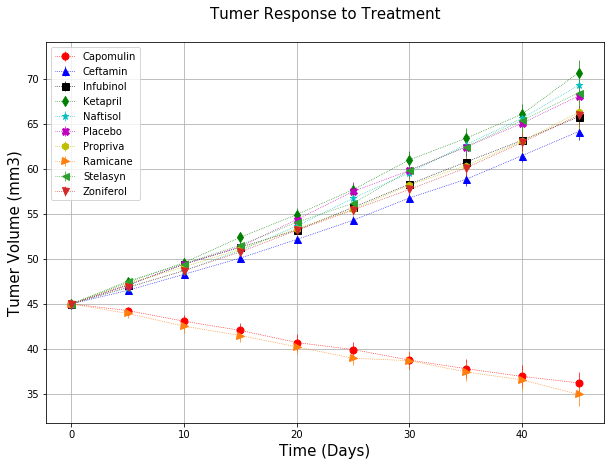

In [8]:

# pre-define symbol and line colors
colors = ["r", "b","k","g","c","m","y","C1","C2","C3"]
symbols = ['o','^','s','d','*','X','h','>','<','v']

x = drug_timepoint_df.index       # x in the plot
drugs = drug_timepoint_df.columns # labels, drug name

# Generate the Plot (with Error Bars)
num_drugs_to_show = len(drugs) # plot 4 to avoid crowdiness

plt.figure(figsize = (10,7))
for i in range(num_drugs_to_show):
    y = drug_timepoint_df.iloc[:,i]
    yerr = mean_tumor_V_df[mean_tumor_V_df["Drug"] == drugs[i]]["Tumer Volumne Standard Error (mm3)"]
    
    plt.errorbar(x, y, yerr = yerr, 
                 c = colors[i], fmt = symbols[i] + ":", 
                 markersize = 7, linewidth = 0.7, label = drugs[i])

# Adjust figure properties
plt.legend(loc = "best")
plt.grid(True)
plt.xlabel("Time (Days)", fontsize = 15)
plt.ylabel("Tumer Volume (mm3)", fontsize = 15)
plt.title ("Tumer Response to Treatment\n", fontsize = 15)

# Save the Figure
plt.savefig("Tumer_Response_To_Treatment.png")
plt.show()

## Metastatic Response to Treatment

In [9]:
mouse_clinic_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1,f932,0,45.0,0,Ketapril
2,g107,0,45.0,0,Ketapril
3,a457,0,45.0,0,Ketapril
4,c819,0,45.0,0,Ketapril


In [10]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
# Convert to DataFrame
metastatic_df = mouse_clinic_df.groupby(["Drug", "Timepoint"]).mean()["Metastatic Sites"].reset_index()

# Preview DataFrame
metastatic_df.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [11]:
# function that finds the data points corresponding to the certain "Drug" and "Timepoint"
# return the standard error of the group of data

def standard_error(row):
    drug = metastatic_df.iloc[row, 0]
    timepoint = mean_tumor_V_df.iloc[row, 1]
    cons = (mouse_clinic_df["Drug"] == drug) & (mouse_clinic_df["Timepoint"] == timepoint)
    sem_df = mouse_clinic_df[cons]
    return sem(sem_df["Metastatic Sites"])

In [12]:
# Store the Standard Error of Tumor Volumes selected by Drug and Timepoint
standard_error_list = []
for i in range(len(mean_tumor_V_df)):
    standard_error_list.append(standard_error(i))

# Convert to pd.Series
metastatic_df["Metastatic Sites Standard Error"] = pd.Series(standard_error_list)

# Preview DataFrame
metastatic_df.head()

,Drug,Timepoint,Metastatic Sites,Metastatic Sites Standard Error
0,Capomulin,0,0.000000,0.000000
1,Capomulin,5,0.160000,0.074833
2,Capomulin,10,0.320000,0.125433
3,Capomulin,15,0.375000,0.132048
4,Capomulin,20,0.652174,0.161621


In [13]:
# Reshape the df to a new format
drug_timepoint_metastatic_df = metastatic_df.pivot(index = "Timepoint", columns = "Drug", values = "Metastatic Sites")

# preview the reshaped DataFrame
drug_timepoint_metastatic_df.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


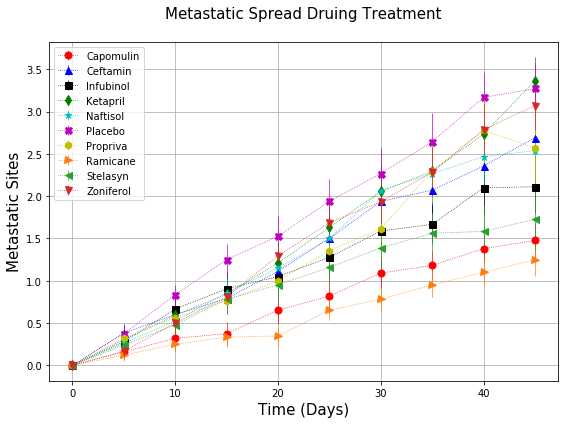

In [14]:
x = drug_timepoint_df.index       # x in the plot
drugs = drug_timepoint_df.columns # labels, drug name

# Generate the Plot (with Error Bars)
num_drugs_to_show = len(drugs) # plot 4 to avoid crowdiness

plt.figure(figsize = (8,6))
for i in range(num_drugs_to_show):
    y = drug_timepoint_metastatic_df.iloc[:,i]
    yerr = metastatic_df[metastatic_df["Drug"] == drugs[i]]["Metastatic Sites Standard Error"]
    
    plt.errorbar(x, y, yerr = yerr, 
                 c = colors[i], fmt = symbols[i] + ":", 
                 markersize = 7, linewidth = 0.7, label = drugs[i])

# Adjust figure properties
plt.legend(loc = "best")
plt.grid(True)
plt.xlabel("Time (Days)", fontsize = 15)
plt.ylabel("Metastatic Sites", fontsize = 15)
plt.title ("Metastatic Spread Druing Treatment\n", fontsize = 15)

# Save the Figure
plt.tight_layout()
plt.savefig("Metastatic_Spread_during_treatment.png")
plt.show()

## Survival Rates

In [15]:
mouse_clinic_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1,f932,0,45.0,0,Ketapril
2,g107,0,45.0,0,Ketapril
3,a457,0,45.0,0,Ketapril
4,c819,0,45.0,0,Ketapril


In [16]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
# Convert to DataFrame
mouse_count_df = mouse_clinic_df.groupby(["Drug","Timepoint"]).count()["Mouse ID"].reset_index()
mouse_count_df.rename(columns = {"Mouse ID": "Mouse Count"}, inplace = True) # rename column
    
# Preview DataFrame
mouse_count_df.head()

,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [17]:
# Minor Data Munging to Re-Format the Data Frames
drug_timepoint_mouse_count_df = mouse_count_df.pivot(index = "Timepoint", columns = "Drug", values = "Mouse Count")

# Preview the Data Frame
drug_timepoint_mouse_count_df.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


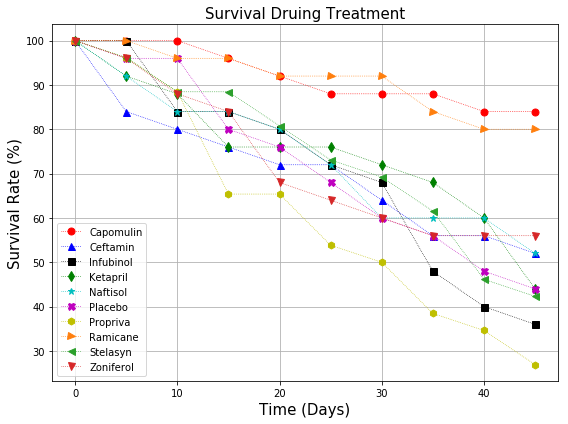

In [18]:
x = drug_timepoint_df.index       # x in the plot
drugs = drug_timepoint_df.columns # labels, drug name

# Generate the Plot (Accounting for percentages)
num_drugs_to_show = len(drugs) # plot 4 to avoid crowdiness
plt.figure(figsize = (8,6))

for i in range(num_drugs_to_show):
    y = drug_timepoint_mouse_count_df.iloc[:,i] / drug_timepoint_mouse_count_df.iloc[0,i] * 100
    
    plt.plot(x, y, colors[i]+ symbols[i] + ":", 
             markersize = 7,linewidth = 0.7, label = drugs[i])

# Adjust figure properties
plt.legend(loc = "best")
plt.grid(True)
plt.xlabel("Time (Days)", fontsize = 15)
plt.ylabel("Survival Rate (%)", fontsize = 15)
plt.title ("Survival Druing Treatment", fontsize = 15)

# Save the Figure
plt.tight_layout()
plt.savefig("Survival_during_treatment.png")
plt.show()

## Summary Bar Graph

In [19]:
# create a pd.DataFrame that contains the change quantities: 
# 1. Tumor Volumne
# 2. Metastatic Sites
# 3. Mouse Count -- for Survivial Rate

change_data_df = pd.merge(mean_tumor_V_df, metastatic_df, on=["Drug", "Timepoint"])
change_data_df = pd.merge(change_data_df, mouse_count_df, on=["Drug", "Timepoint"])
change_data_df = change_data_df[(change_data_df['Timepoint'] == timepoint_list[0]) | 
                                (change_data_df['Timepoint'] == timepoint_list[-1])]

del change_data_df["Tumer Volumne Standard Error (mm3)"]
del change_data_df["Metastatic Sites Standard Error"]

change_data_df.head()

,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites,Mouse Count
0,Capomulin,0,45.000000,0.000000,25
9,Capomulin,45,36.236114,1.476190,21
10,Ceftamin,0,45.000000,0.000000,25
19,Ceftamin,45,64.132421,2.692308,13
20,Infubinol,0,45.000000,0.000000,25


In [20]:
# Calculate the percent changes for each drug
change_summary_df = pd.DataFrame()

for x in change_data_df.columns[2:]:
    change_df = change_data_df.pivot(index = "Drug", columns = "Timepoint", values = x)
    change = change_df.iloc[:,1] - change_df.iloc[:,0]
    
    # if no datum is zero, devide and calculate percentage, otherwise, report the change
    if change_df.iloc[:,0].all() != 0:
        change_summary_df[x] = change / change_df.iloc[:,0] * 100
    else: 
        change_summary_df[x] = change
    
change_summary_df.rename(columns = {change_data_df.columns[2:][0]: 
                                    change_data_df.columns[2:][0] + " (Percent Change %)",
                                    change_data_df.columns[2:][1]: 
                                    change_data_df.columns[2:][1] + " (Number Change)",
                                    change_data_df.columns[2:][2]:
                                    change_data_df.columns[2:][2] + " (Percent Change %)"
                                   })

,Tumor Volume (mm3) (Percent Change %),Metastatic Sites (Number Change),Mouse Count (Percent Change %)
Drug,,,
Capomulin,-19.475303,1.476190,-16.000000
Ceftamin,42.516492,2.692308,-48.000000
Infubinol,46.123472,2.111111,-64.000000
Ketapril,57.028795,3.363636,-56.000000
Naftisol,53.923347,2.538462,-48.000000
Placebo,51.297960,3.272727,-56.000000
Propriva,47.241175,2.571429,-73.076923
Ramicane,-22.320900,1.250000,-20.000000
Stelasyn,52.085134,1.727273,-57.692308


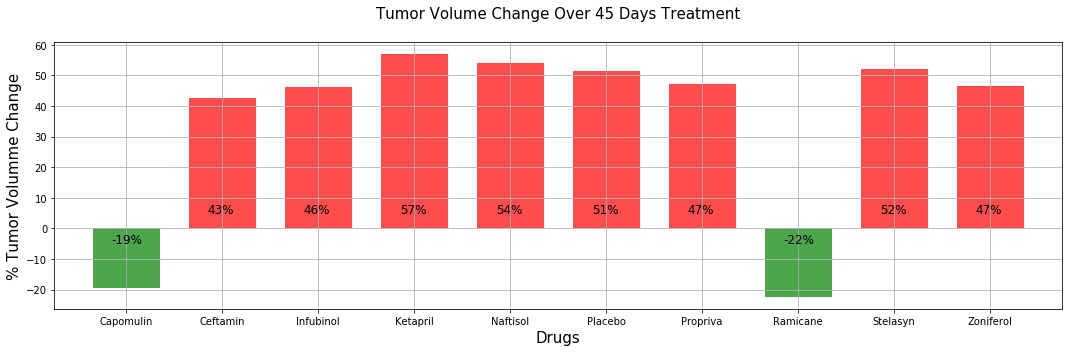

In [21]:
# Bar chart for tumer volumne % change
# Orient widths. Add labels, tick marks, etc. 
h = change_summary_df.iloc[:,0].plot(kind = "bar",
                                     figsize = (15,5),
                                     width = 0.7,
                                     color = ['r' if x > 0 else 'g' for x in change_summary_df.iloc[:,0]],
                                     alpha = 0.7
                                    )

# Label the percentages of changes
for i in range(len(change_summary_df.index)):
    change = change_summary_df.iloc[i,0]
    if change > 0: y = 5
    else: y = -5
    h.text(i - 0.15, y, "{:.0f}%".format(change_summary_df.iloc[i,0]), fontsize = 12)
        
# Set figure properties: labels, xlim, grid, ect
h.grid(True)
h.set_xticklabels(change_summary_df.index, rotation = 0)
h.set_xlim(-.75, len(change_summary_df)-0.25)
h.set_xlabel("Drugs", fontsize = 15)
h.set_ylabel("% tumor volumme change".title(), fontsize = 15)
h.set_title("tumor Volume change over 45 days treatment\n".title(), fontsize = 15)

# Save the Figure
plt.tight_layout()
plt.savefig("Effect_on_tumer_size.png")
plt.show()